In [ ]:
import pandas as pd

# Load Togo data
togo_df = pd.read_csv('../data/togo-dapaong_qc.csv', parse_dates=['Timestamp'])

togo_df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [ ]:
import os
print(os.getcwd())


C:\Users\helin\solar-farm-discovery\notebooks


In [ ]:
import os
print(os.listdir("../data"))

['benin-malanville.csv', 'sierraleone-bumbuna.csv', 'togo-dapaong_qc.csv']


In [ ]:
togo_df = pd.read_csv("../data/togo-dapaong_qc.csv", parse_dates=["Timestamp"])

In [ ]:
togo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

In [ ]:
print("Start:", togo_df["Timestamp"].min())
print("End:", togo_df["Timestamp"].max())
print("Frequency:", togo_df["Timestamp"].diff().mode()[0])

Start: 2021-10-25 00:01:00
End: 2022-10-25 00:00:00
Frequency: 0 days 00:01:00


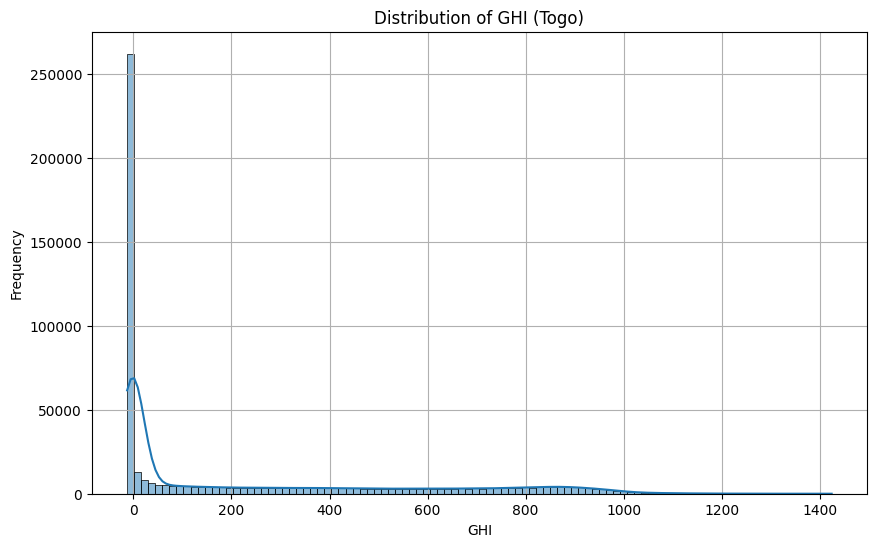

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(togo_df["GHI"], bins=100, kde=True)
plt.title("Distribution of GHI (Togo)")
plt.xlabel("GHI")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [ ]:
togo_df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'ModA', 'ModB']].corr()

,GHI,DNI,DHI,TModA,TModB,ModA,ModB
GHI,1.000000,0.877293,0.852080,0.898211,0.919220,0.994964,0.995439
DNI,0.877293,1.000000,0.532717,0.765881,0.783572,0.889702,0.889708
DHI,0.852080,0.532717,1.000000,0.802319,0.820360,0.833037,0.832648
TModA,0.898211,0.765881,0.802319,1.000000,0.985069,0.886888,0.885551
TModB,0.919220,0.783572,0.820360,0.985069,1.000000,0.906796,0.906427
ModA,0.994964,0.889702,0.833037,0.886888,0.906796,1.000000,0.999564
ModB,0.995439,0.889708,0.832648,0.885551,0.906427,0.999564,1.000000


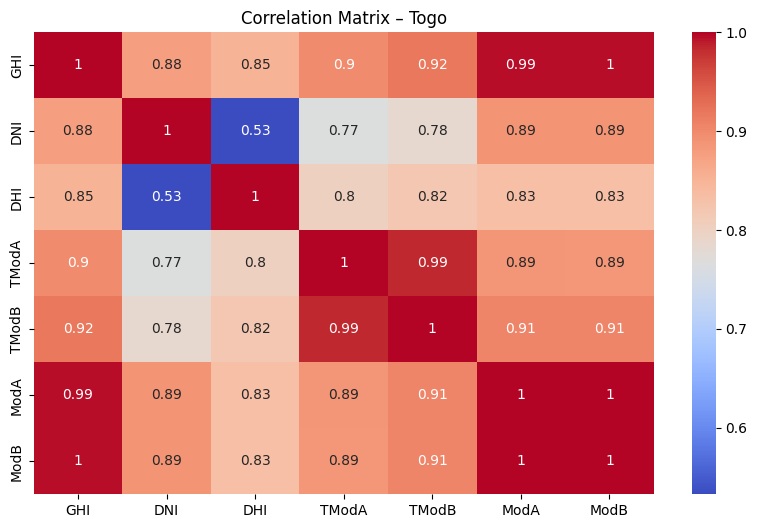

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(togo_df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'ModA', 'ModB']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix – Togo")
plt.show()

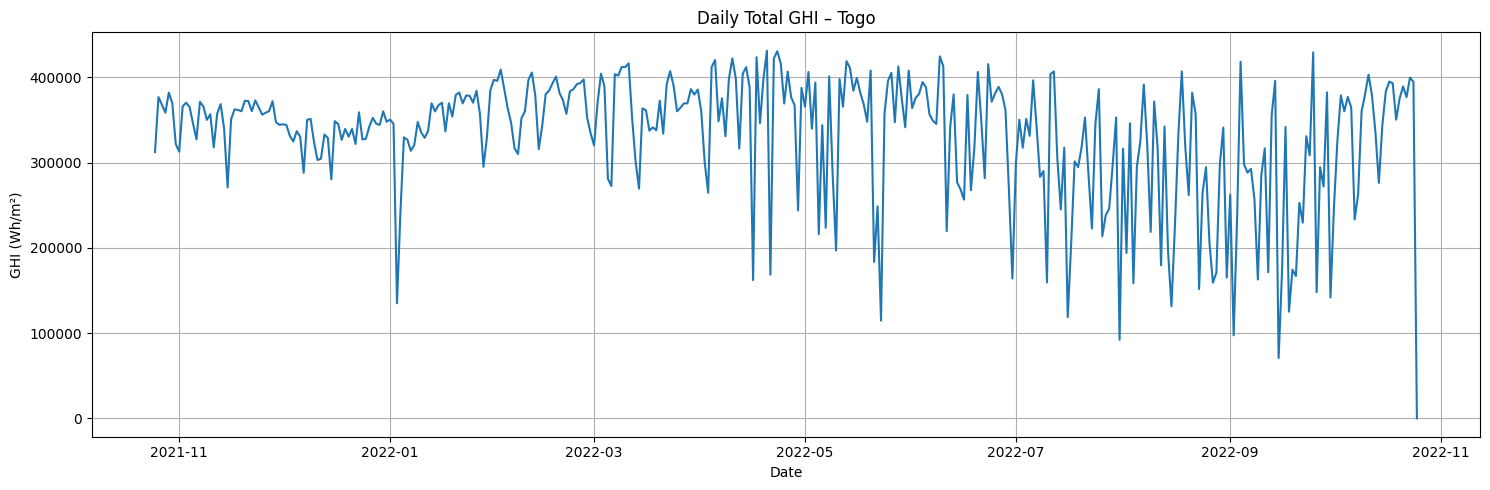

In [ ]:
togo_df['Date'] = togo_df['Timestamp'].dt.date
daily_ghi = togo_df.groupby('Date')['GHI'].sum()

plt.figure(figsize=(15,5))
daily_ghi.plot()
plt.title("Daily Total GHI – Togo")
plt.xlabel("Date")
plt.ylabel("GHI (Wh/m²)")
plt.grid(True)
plt.tight_layout()
plt.show()


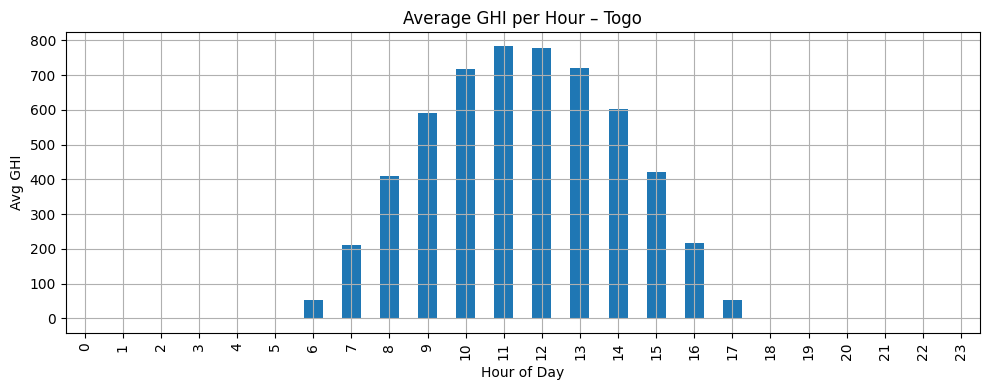

In [ ]:
togo_df['Hour'] = togo_df['Timestamp'].dt.hour
hourly_ghi = togo_df.groupby('Hour')['GHI'].mean()

plt.figure(figsize=(10,4))
hourly_ghi.plot(kind='bar')
plt.title("Average GHI per Hour – Togo")
plt.xlabel("Hour of Day")
plt.ylabel("Avg GHI")
plt.grid(True)
plt.tight_layout()
plt.show()


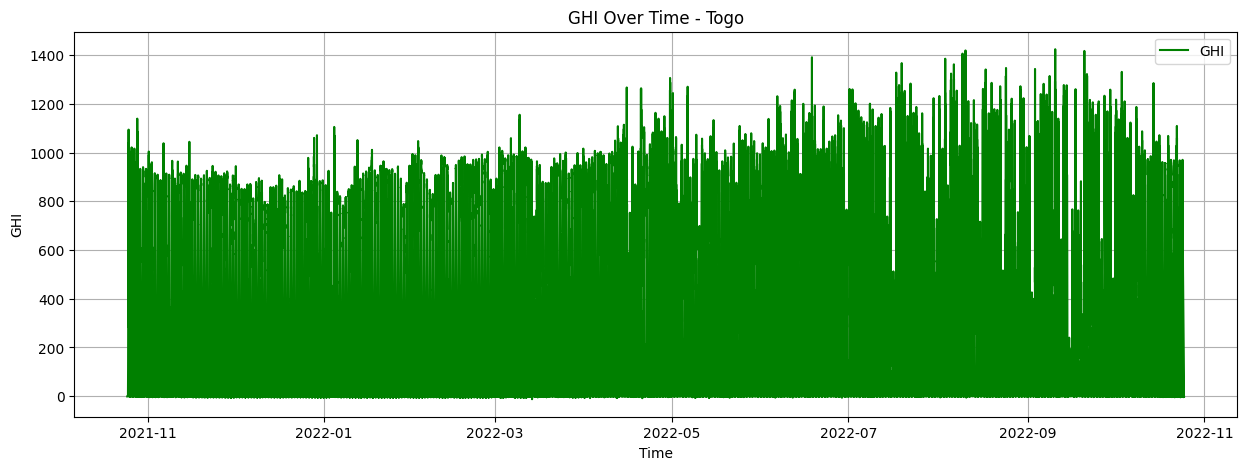

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(togo_df['Timestamp'], togo_df['GHI'], label='GHI', color='green')
plt.title('GHI Over Time - Togo')
plt.xlabel('Time')
plt.ylabel('GHI')
plt.grid(True)
plt.legend()
plt.show()


In [4]:
import pandas as pd

# Load the cleaned or raw dataset depending on your stage
togo_df = pd.read_csv("../data/togo-dapaong_qc.csv", parse_dates=["Timestamp"])
# Summary statistics
togo_df.describe().T
# Check for missing values
missing_values = togo_df.isna().sum()
missing_percentage = (missing_values / len(togo_df)) * 100

missing_report = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

# Display all rows or just those with >5% missing
missing_report[missing_report['Percentage (%)'] > 5]

,Missing Values,Percentage (%)
Comments,525600,100.0


In [5]:
togo_df.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-04-25 12:00:30.000000768,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
min,2021-10-25 00:01:00,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,2022-01-24 06:00:45,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2022-04-25 12:00:30,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,2022-07-25 18:00:15,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,2022-10-25 00:00:00,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN
std,NaN,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN


In [6]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
# Calculate z-scores
# Drop rows with NaNs temporarily for z-score calculation
zscore_df = togo_df[columns_to_check].dropna()

# Compute Z-scores
z_scores = np.abs(zscore(zscore_df))

# Create a DataFrame for Z-scores
z_scores_df = pd.DataFrame(z_scores, columns=columns_to_check)

# Flag rows with any |Z| > 3 as outliers
outlier_mask = (z_scores_df > 3).any(axis=1)

# Count and view how many outliers
print("Number of outlier rows:", outlier_mask.sum())

# Optional: get the indices or rows with outliers
outliers = zscore_df[outlier_mask]
outliers.head()


Number of outlier rows: 9251


,GHI,DNI,DHI,ModA,ModB,WS,WSgust
4985,1139.0,805.1,466.1,1172.0,1154.0,2.2,2.6
5410,-1.2,0.0,0.0,0.0,0.0,6.6,9.7
5411,-1.0,0.0,0.0,0.0,0.0,6.9,8.9
5413,-0.8,0.0,0.0,0.0,0.0,7.1,8.9
5420,-1.3,0.0,0.0,0.0,0.0,6.1,8.9


In [7]:
# Create a new column to mark outliers
togo_df['IsOutlier'] = False

# Re-align index to original df to mark correct rows
togo_df.loc[zscore_df.index[outlier_mask], 'IsOutlier'] = True

# Check out some flagged rows
togo_df[togo_df['IsOutlier'] == True].head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,IsOutlier
4985,2021-10-28 11:06:00,1139.0,805.1,466.1,1172.0,1154.0,29.8,70.8,2.2,2.6,0.4,298.6,13.4,977,0,0.0,44.7,50.2,NaN,True
5410,2021-10-28 18:11:00,-1.2,0.0,0.0,0.0,0.0,29.7,63.5,6.6,9.7,1.6,122.1,14.3,976,0,0.0,30.0,29.5,NaN,True
5411,2021-10-28 18:12:00,-1.0,0.0,0.0,0.0,0.0,29.3,62.4,6.9,8.9,1.2,128.7,10.8,976,0,0.0,29.9,29.5,NaN,True
5413,2021-10-28 18:14:00,-0.8,0.0,0.0,0.0,0.0,28.6,63.7,7.1,8.9,1.1,127.9,14.4,976,0,0.0,29.5,29.2,NaN,True
5420,2021-10-28 18:21:00,-1.3,0.0,0.0,0.0,0.0,27.7,64.5,6.1,8.9,1.3,123.2,14.4,977,0,0.0,28.4,28.2,NaN,True


In [8]:
# Impute outliers with median for selected columns
for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']:
    median_value = togo_df[col].median()
    togo_df.loc[togo_df['IsOutlier'] & (togo_df[col].notna()), col] = median_value


In [9]:
togo_df.drop(columns=["Comments"], inplace=True)
# dropped because it is not useful for analysis and empty

In [10]:
togo_df.to_csv("data/togo_clean.csv", index=False)


OSError: Cannot save file into a non-existent directory: 'data'

In [11]:
import os
print(os.getcwd())


c:\Users\helin\solar-farm-discovery\notebooks


In [12]:
togo_df.to_csv("../data/togo_clean.csv", index=False)


In [13]:
import pandas as pd

# Load original data (before cleaning/imputation)
orig_df = pd.read_csv("../data/togo-dapaong_qc.csv", parse_dates=["Timestamp"])


In [14]:
from scipy.stats import zscore

cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = orig_df[cols_to_check].apply(zscore)
orig_df['IsOutlier'] = (z_scores.abs() > 3).any(axis=1)


In [15]:
clean_df = pd.read_csv("../data/togo_clean.csv", parse_dates=["Timestamp"])
# Check if the number of outliers in the cleaned data is less than in the original

In [16]:
# Pre-cleaning
pre_clean_avg = orig_df.groupby('IsOutlier')[['ModA', 'ModB']].mean().rename(columns=lambda x: f"Pre_{x}")

# Post-cleaning
post_clean_avg = clean_df.groupby('IsOutlier')[['ModA', 'ModB']].mean().rename(columns=lambda x: f"Post_{x}")

# Merge
impact_df = pd.concat([pre_clean_avg, post_clean_avg], axis=1)
impact_df


,Pre_ModA,Pre_ModB,Post_ModA,Post_ModB
IsOutlier,,,,
False,219.380751,213.028150,219.380751,213.02815
True,603.659248,584.626257,4.400000,4.30000


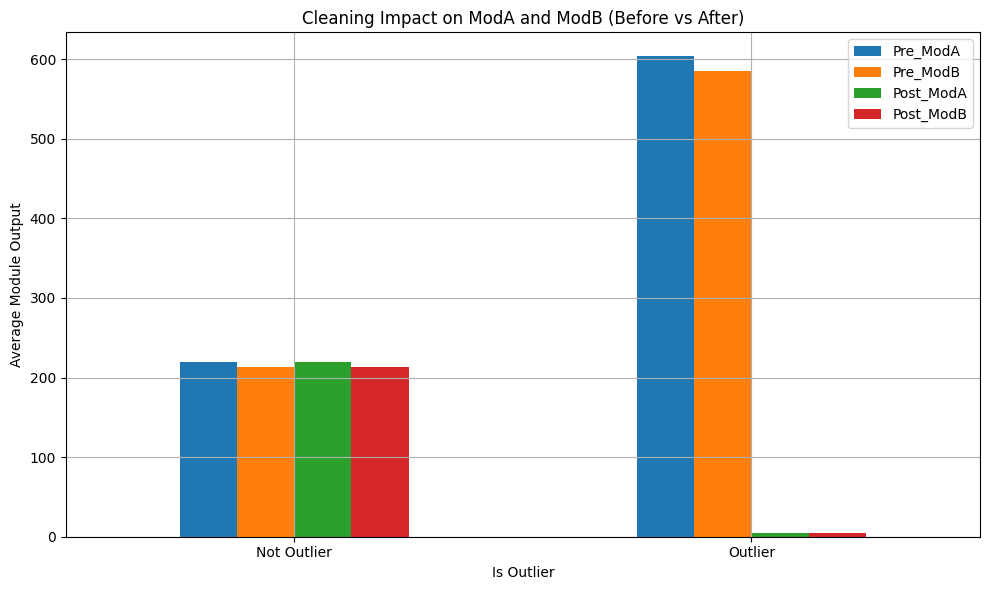

In [17]:
import matplotlib.pyplot as plt

impact_df.plot(kind='bar', figsize=(10, 6))
plt.title("Cleaning Impact on ModA and ModB (Before vs After)")
plt.ylabel("Average Module Output")
plt.xlabel("Is Outlier")
plt.xticks(ticks=[0, 1], labels=["Not Outlier", "Outlier"], rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()
# Save the cleaned data

Interpretation
This will clearly show if my cleaning method:
Over-smoothed data (e.g., outlier values become too close to normal ones),
Or effectively brought extreme values back in line with normal readings.

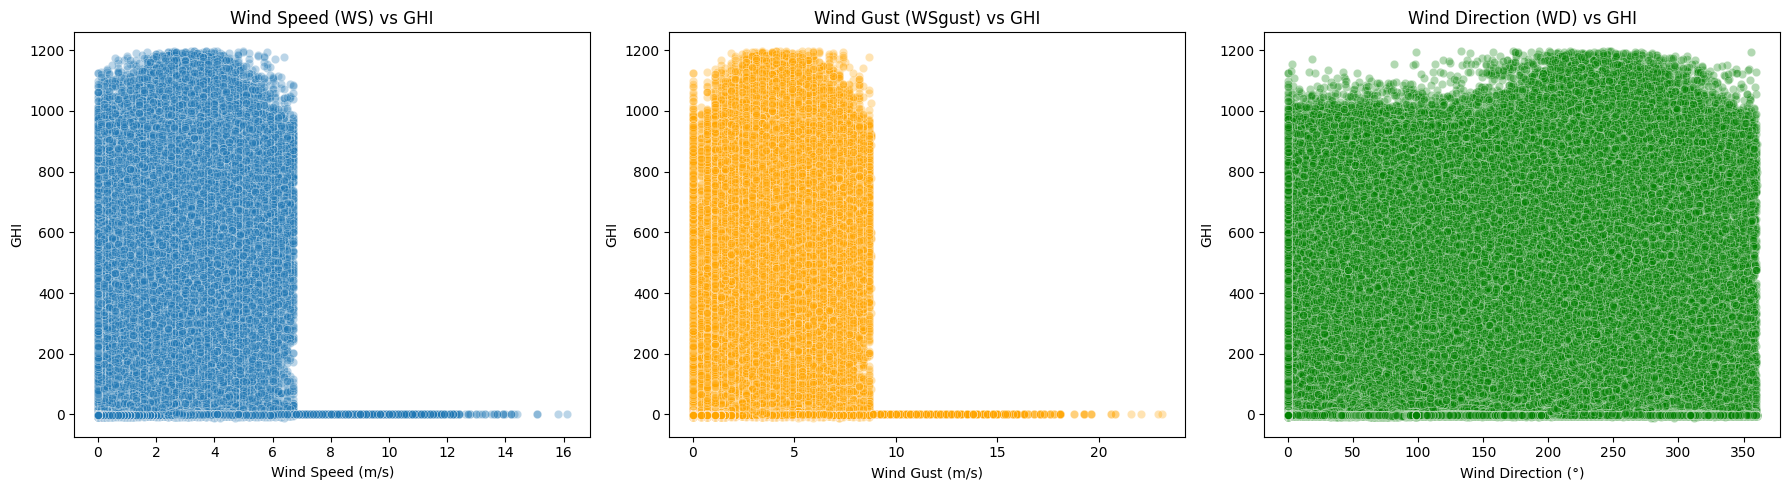

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))

# Wind Speed vs GHI
plt.subplot(1, 3, 1)
sns.scatterplot(data=togo_df, x='WS', y='GHI', alpha=0.3)
plt.title('Wind Speed (WS) vs GHI')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('GHI')

# Wind Gust vs GHI
plt.subplot(1, 3, 2)
sns.scatterplot(data=togo_df, x='WSgust', y='GHI', alpha=0.3, color='orange')
plt.title('Wind Gust (WSgust) vs GHI')
plt.xlabel('Wind Gust (m/s)')
plt.ylabel('GHI')

# Wind Direction vs GHI
plt.subplot(1, 3, 3)
sns.scatterplot(data=togo_df, x='WD', y='GHI', alpha=0.3, color='green')
plt.title('Wind Direction (WD) vs GHI')
plt.xlabel('Wind Direction (°)')
plt.ylabel('GHI')

plt.tight_layout()
plt.show()


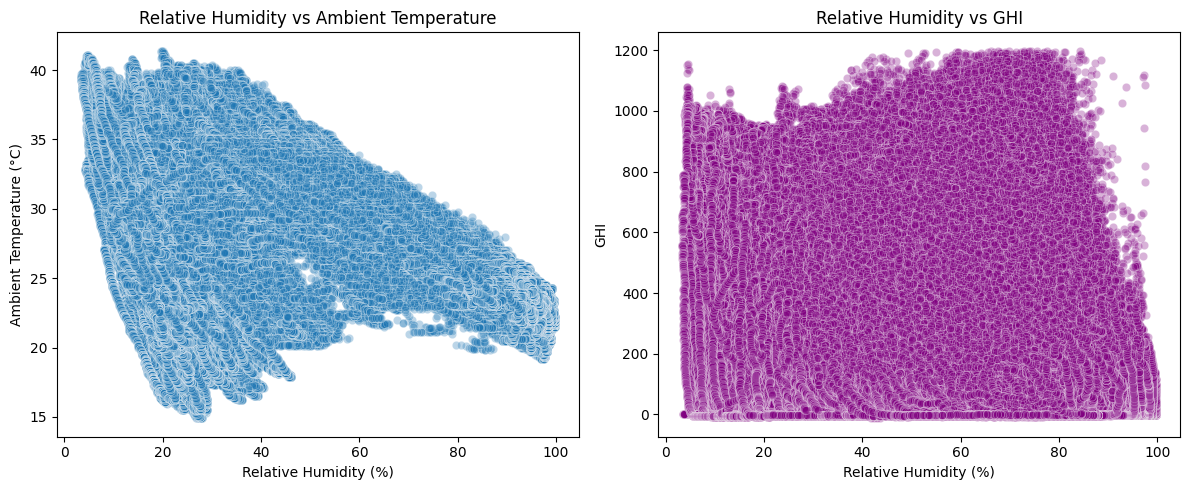

In [19]:
plt.figure(figsize=(12, 5))

# RH vs Tamb
plt.subplot(1, 2, 1)
sns.scatterplot(data=togo_df, x='RH', y='Tamb', alpha=0.3)
plt.title('Relative Humidity vs Ambient Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')

# RH vs GHI
plt.subplot(1, 2, 2)
sns.scatterplot(data=togo_df, x='RH', y='GHI', alpha=0.3, color='purple')
plt.title('Relative Humidity vs GHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI')

plt.tight_layout()
plt.show()


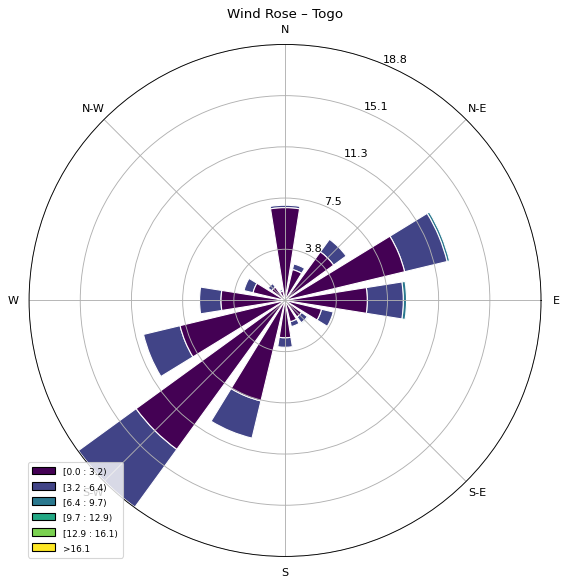

In [20]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt

# Drop rows with missing WS or WD
wind_data = togo_df[['WS', 'WD']].dropna()

# Plot wind rose
ax = WindroseAxes.from_ax()
ax.bar(wind_data['WD'], wind_data['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_title('Wind Rose – Togo')
ax.set_legend()
plt.show()


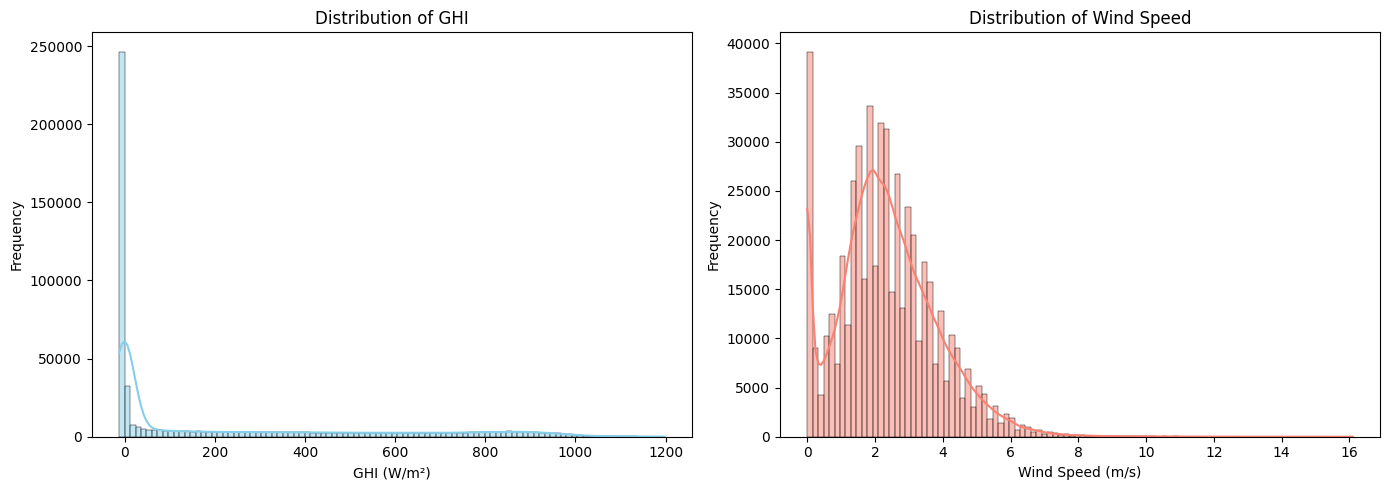

In [21]:
plt.figure(figsize=(14, 5))

# GHI Histogram
plt.subplot(1, 2, 1)
sns.histplot(togo_df['GHI'], bins=100, kde=True, color='skyblue')
plt.title('Distribution of GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')

# WS Histogram
plt.subplot(1, 2, 2)
sns.histplot(togo_df['WS'], bins=100, kde=True, color='salmon')
plt.title('Distribution of Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


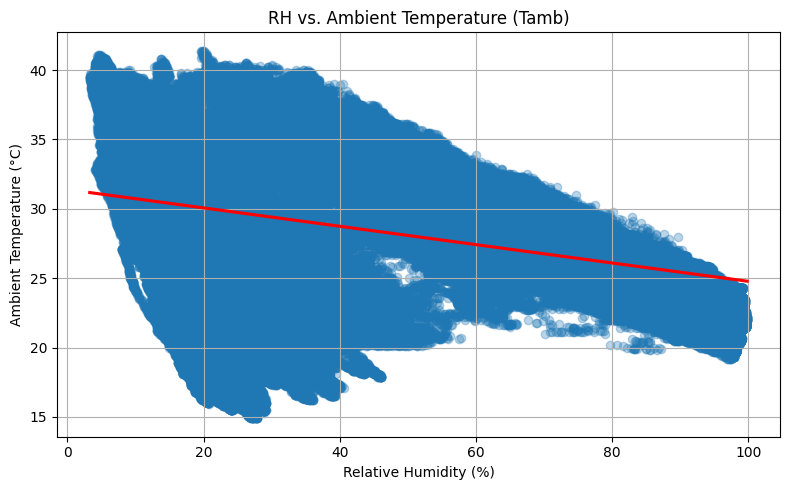

In [23]:
plt.figure(figsize=(8, 5))
sns.regplot(data=togo_df, x='RH', y='Tamb', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title("RH vs. Ambient Temperature (Tamb)")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Ambient Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()


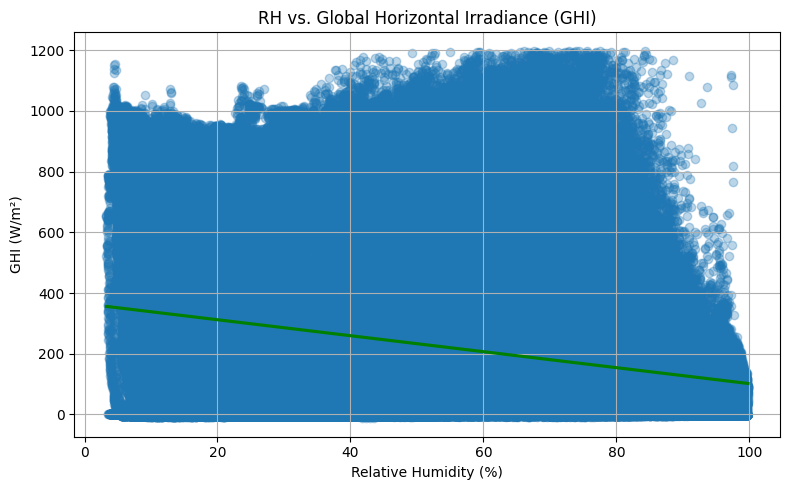

In [24]:
plt.figure(figsize=(8, 5))
sns.regplot(data=togo_df, x='RH', y='GHI', scatter_kws={'alpha':0.3}, line_kws={'color':'green'})
plt.title("RH vs. Global Horizontal Irradiance (GHI)")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("GHI (W/m²)")
plt.grid(True)
plt.tight_layout()
plt.show()


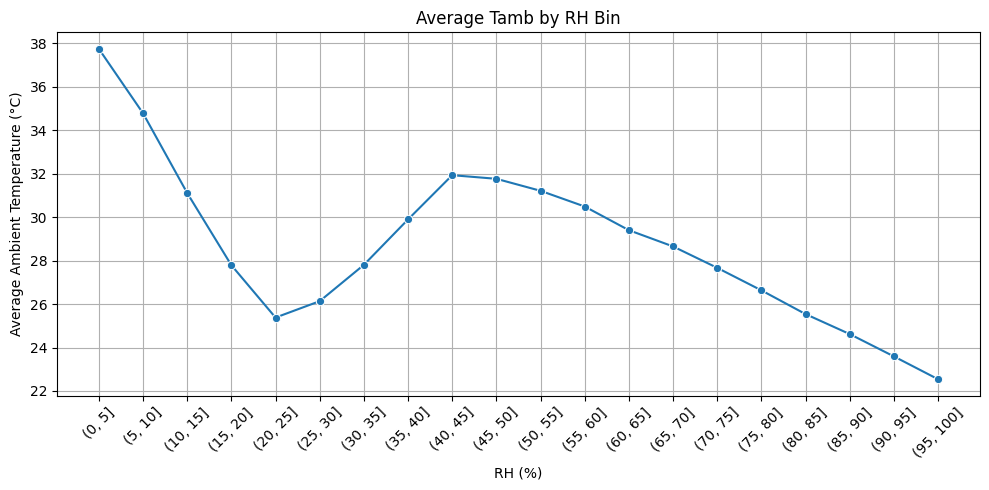

In [27]:
# Convert RH_bin to string for plotting
rh_temp['RH_bin_str'] = rh_temp['RH_bin'].astype(str)

plt.figure(figsize=(10, 5))
sns.lineplot(data=rh_temp, x='RH_bin_str', y='Tamb', marker='o')
plt.xticks(rotation=45)
plt.title("Average Tamb by RH Bin")
plt.xlabel("RH (%)")
plt.ylabel("Average Ambient Temperature (°C)")
plt.tight_layout()
plt.grid(True)
plt.show()


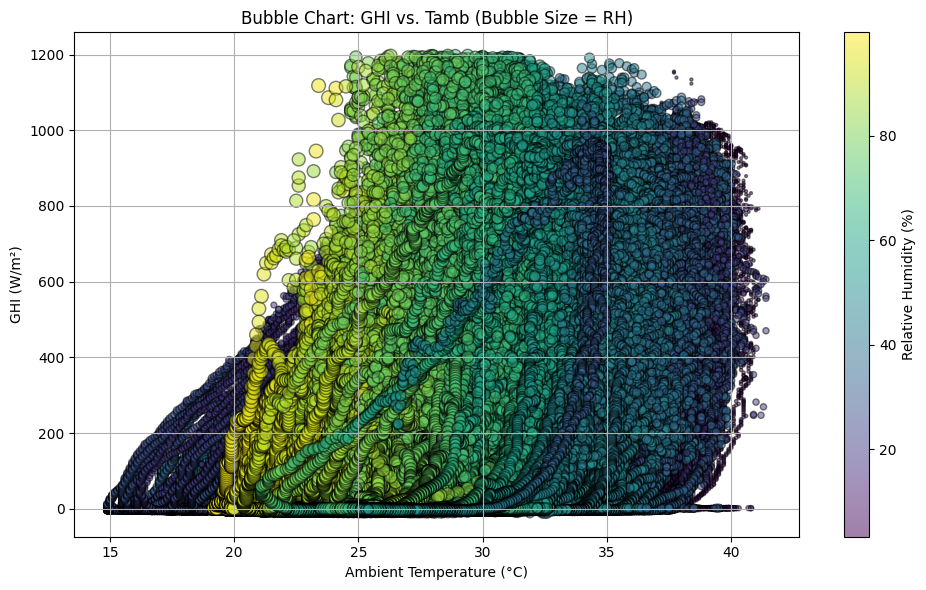

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(
    togo_df['Tamb'], 
    togo_df['GHI'], 
    s=togo_df['RH'],        # Bubble size
    c=togo_df['RH'],        # Bubble color
    cmap='viridis', 
    alpha=0.5, 
    edgecolor='k'
)
plt.colorbar(label='Relative Humidity (%)')
plt.title("Bubble Chart: GHI vs. Tamb (Bubble Size = RH)")
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("GHI (W/m²)")
plt.grid(True)
plt.tight_layout()
plt.show()
